## multi-class 클래스가 2개보다 많을 때

클래스 2개 초과될 때

- 이진 분류(클래스가 2개일 때) 에서는 타켓(찾고싶은 y)만 관심이 있었다.
- x feed, model(x) = x의 클래스가 1일 확률, x가 클래스 0일 확률 = 1 - p(x, y=1)
- 클래스가 k=3 이다
- model(x) = x가 클래스 0일 확률, x가 클래스 1일 확률, x가 클래스 3일 확률

In [3]:
import numpy as np

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [5]:
np.exp(0), np.exp(1), np.exp(2)  # exponencial 지수함수

(1.0, 2.718281828459045, 7.38905609893065)

In [6]:
np.exp(-1), np.exp(-2), np.exp(-3)  # exponencial 지수함수

(0.36787944117144233, 0.1353352832366127, 0.049787068367863944)

In [11]:
np.set_printoptions(6, suppress=True)
y = [0,1]
# h = Wx + b
# y = sigmoid(Wx + b) 
h = np.array([-10, 10])
sigmoid(h)

array([0.000045, 0.999955])

In [12]:
# 클래스 3개가 존재할 때 한 샘플에 대해서 다음가 같은 예측이 나왔다고 가정하자.
h = np.array([[2.0, 1.0, 0.1]])  # 한 샘플에 대한 예측값, 확률로 바꾸자
norm = h/np.sum(h)
norm

array([[0.645161, 0.322581, 0.032258]])

In [13]:
# 지수를 취해 차이를 키울 곳은 키우고 줄일 곳은 줄인다
h_e = np.exp(h)
h, h_e

(array([[2. , 1. , 0.1]]), array([[7.389056, 2.718282, 1.105171]]))

In [15]:
softmax = h_e/np.sum(h_e)
softmax

array([[0.659001, 0.242433, 0.098566]])

In [1]:
y = [0, 1, 2]
y_hot = [[1,0,0], [0,1,0], [0,0,1]]  # one-hot encoding
h = [[0.999, 0.001, 0], [0,0.99,0], [0.01, 0.1, 0.89]]  # 정확한 예측이 나왔다

In [17]:
from sklearn.datasets import load_iris

x, y = load_iris(True)
x.shape, y.shape, set(y)

((150, 4), (150,), {0, 1, 2})

In [18]:
x_norm = (x -np.min(x, 0))/(np.max(x, 0)-np.min(x,0))

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

model = MLPClassifier().fit(x_norm, y)
model.score(x_norm, y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9266666666666666

In [24]:
model = MLPClassifier().fit(x, y)
model.score(x, y)  # accuracy

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9733333333333334

In [37]:
model = LogisticRegression(max_iter=1000).fit(x_norm, y)  # underfitting 과소적합
model.score(x_norm, y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8466666666666667

In [41]:
model = LogisticRegression(max_iter=1000).fit(x, y)   
model.score(x, y)  # accuracy

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.96

In [38]:
model.coef_, model.intercept_
# 클래스가 3개여서 3줄이고 각각 컬럼은 특성

(array([[-1.448812,  2.295231, -3.147718, -3.102981],
        [-0.038074, -2.766927,  0.985824, -0.368619],
        [ 0.788402, -0.778132,  1.898731,  3.04844 ]]),
 array([ 1.069876,  0.181827, -3.33017 ]))

In [42]:
# 첫 번째 샘플로 테스트 해보자
x0 = x[0]
y0 = y[0]
x0, y0

(array([5.1, 3.5, 1.4, 0.2]), 0)

In [44]:
# y = softmax(Wx + b)
h = np.sum(model.coef_ * x0, axis=1) + model.intercept_
h # 점수

array([  4.112641,  -1.843278, -11.32258 ])

In [45]:
# 보기 불편하니까 확률로 바꿔보자
h_e = np.exp(h)
h_e / np.sum(h_e)

array([0.997416, 0.002584, 0.      ])

In [113]:
from sklearn.datasets import load_digits

In [114]:
x, y = load_digits(return_X_y = True)
x.shape, y.shape

((1797, 64), (1797,))

train과 test 데이터셋을 나눈다

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [80]:
model = MLPClassifier(hidden_layer_sizes=(16, 16, 16)).fit(x_train, y_train)
model.score(x_test,y_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9310344827586207

In [81]:
model = MLPClassifier(hidden_layer_sizes=(64, 64, 64)).fit(x_train, y_train)
model.score(x_test,y_test)

0.9688542825361512

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [84]:
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32)).fit(x_train, y_train)
model.score(x_test,y_test)

0.975

In [89]:
# 히든 레이어를 디자인 할 수 있다.
model = MLPClassifier(hidden_layer_sizes=(128, 128, 64), random_state = 47).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test,y_test)

(1.0, 0.9833333333333333)

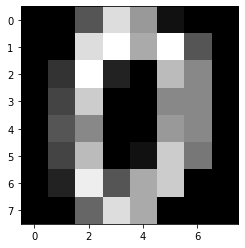

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x0.reshape(8,8), cmap='gray')

In [91]:
x2 = np.stack((x[0], x[1]), axis = 0)
x2.shape

(2, 64)

In [92]:
x0 = x[0].reshape((8,8))
x1 = x[1].reshape((8,8))
x2 = np.concatenate((x0, x1), axis = 1)
x2.shape
x0.shape, x1.shape

((8, 8), (8, 8))

In [93]:
x2 = np.concatenate((x0, x1), axis = 1)
x2.shape

(8, 16)

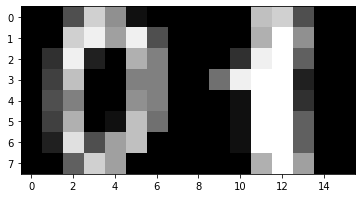

In [95]:
plt.imshow(x2, cmap='gray')

멀티 테스크 - 하나의 모델로 여러가지 작업을 동시에 처리한다. 

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import random

In [3]:
x, y = load_digits(return_X_y = True)
x.shape, y.shape

((1797, 64), (1797,))

In [121]:
split_size = len(x)//2

x_train = x[:split_size]
x_test = x[split_size:-1]
y_train = y[:split_size]
y_test = y[split_size:-1]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((898, 64), (898, 64), (898,), (898,))

In [5]:
x_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
y_train[0]

0

In [139]:
def preprocessing(x1, x2, y1, y2, nparray=True):
    concat_img = []
    labels = []
    for img1, img2, l1, l2 in zip(x1, x2, y1, y2):
        concat_img.append(np.concatenate((img1.reshape((8,8)), img2.reshape((8,8))), axis = 1))
        labels.append([l1, l2])
    if nparray:
        return np.array([np.reshape(img,[-1]) for img in concat_img]), np.array(labels)
    else:
        return [np.reshape(img,[-1]) for img in concat_img] , labels

In [152]:
# x1 = random.sample(list(x_train), len(x_train)//2)
# x2 = random.sample(list(x_train), len(x_train)//2)
n = []
for img, label in zip(x_train, y_train):
    n.append([img, label])
    
random_list = random.sample(list(n), len(x_train)//2)
x1 = [random_list[i][0] for i in range(len(random_list))]
y1 = [random_list[i][1] for i in range(len(random_list))]

random_list = random.sample(list(n), len(x_train)//2)
x2 = [random_list[i][0] for i in range(len(random_list))]
y2 = [random_list[i][1] for i in range(len(random_list))]
# x1 = x_train[:split_size//2]
# x2 = x_train[split_size//2:]
# y1 = y_train[:split_size//2]
# y2 = y_train[split_size//2:]

train_x, train_y = preprocessing(x1, x2, y1, y2)
train_x.shape, train_y.shape

((449, 128), (449, 2))

In [147]:
# x1 = random.sample(list(x_train), len(x_train)//2)
# x2 = random.sample(list(x_train), len(x_train)//2)
x1 = x_train[:split_size//2] 
x2 = x_train[split_size//2:]
y1 = y_train[:split_size//2]
y2 = y_train[split_size//2:] 

train_x, train_y = preprocessing(x1, x2, y1, y2)
train_x.shape, train_y.shape

((449, 128), (449, 2))

In [148]:
type(x1)

numpy.ndarray

In [130]:
x3 = x_test[:split_size//2]
x4 = x_test[split_size//2:]
y3 = y_test[:split_size//2]
y4 = y_test[split_size//2:]

test_x, test_y = preprocessing(x3, x4, y3, y4)

test_x.shape, test_y.shape

((449, 128), (449, 2))

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000)
model = MultiOutputClassifier(mlp).fit(train_x, train_y)
model.score(train_x, train_y), model.score(test_x, test_y)

(1.0, 0.8106904231625836)

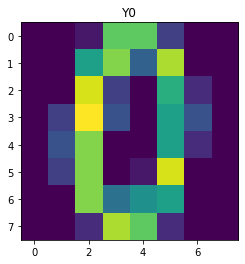

In [124]:
plt.title('Y'+str(y4[12]))
plt.imshow(x4[12].reshape(8,8))

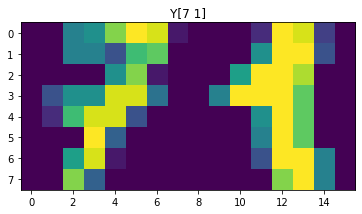

In [120]:
plt.title('Y'+str(train_y[7]))
plt.imshow(train_x[7].reshape(8,16))

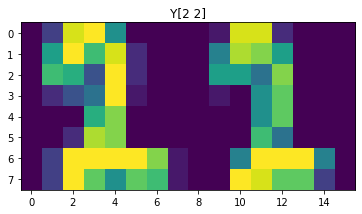

In [135]:
plt.title('Y'+str(test_y[119]))
plt.imshow(test_x[119].reshape(8,16))